In [46]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:.0f}'.format


df = pd.read_csv('prodgy_population_task1.csv' , skiprows=5)
world_population_all_years = df[df['Country Name'] == 'World']
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,104257,104874,105439,105962,106442,106585,106537,106445,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,NaN,NaN


In [47]:
world_population_all_years

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
259,World,WLD,"Population, total",SP.POP.TOTL,3031474234,3072421801,3126849612,3193428894,3260441925,3328209022,...,7403850164,7490415449,7576441961,7660371127,7741774583,7820205606,7888305693,7950946801,NaN,NaN


READING CSV:

Turns out we can not read a csv file if there is irregular pattern somewhere just as we have in the start. So to fix that we use this "skiprows" parameter of pandas read_csv function.

CLEANING DATA:

This dataset had :
- 68 unnamed columns 
- one empty column named: 2023

In [48]:
columns_to_remove = ['2023']
df =df.drop(columns=columns_to_remove)


In [49]:

df = df.dropna(axis=1, how='all')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987


REMOVED!


In [50]:
print(len(df['Country Name']))

266


There are about 266 countries mentioned in this data set
now, lets find out the country with largest population in 1960

Largest Population in 1960:

In [51]:

countries_in_1960 = df[['Country Name','1960']]
countries_in_1960.head()

,Country Name,1960
0,Aruba,54608
1,Africa Eastern and Southern,130692579
2,Afghanistan,8622466
3,Africa Western and Central,97256290
4,Angola,5357195


In [52]:
largest_population = df.nlargest(5,'1960')[['Country Name','1960']]
largest_population.head()


,Country Name,1960
259,World,3031474234
103,IDA & IBRD total,2297972283
140,Low & middle income,2243178704
156,Middle income,2107416130
102,IBRD only,1904346683


COUNTRY "WORLD" :

When searching for the country with the greatest population in 1960, I encountered an error in the csv. It appears that there is a row labeled "World" in the dataset. This row should not be included in the analysis as it represents a global population aggregate rather than an individual country.

COUNTRY "income etc":

income data and data other than country names shouldnt be under that column.

to deal with it ,  we are going to ignore it when comparing so lets first save it in a df(on top "world_population_all_years")

In [53]:
filtered_df = df[df['Country Name'] != 'World']
filtered_df = filtered_df[~filtered_df['Country Name'].str.contains('income|only|dividend|total|situation' , case=False)]
largest_population = filtered_df.nlargest(5,'1960')[['Country Name','1960']]
largest_population.head()

,Country Name,1960
63,East Asia & Pacific,1043333636
230,East Asia & Pacific (IDA & IBRD countries),884811163
181,OECD members,807630906
40,China,667070000
65,Europe & Central Asia,666273660


LARGEST POPULATION IN 1960:

After analyzing the data in different ways, it was found that in 1960, China had the largest population compared to all countries. Even when compared only to OECD members, East Asia & Pacific countries together, or Europe & Central Asia together, China still held the fourth position with a population of 667 Millions and 70 Thousands.(667,070,000).

Text(0, 0.5, 'Millions')

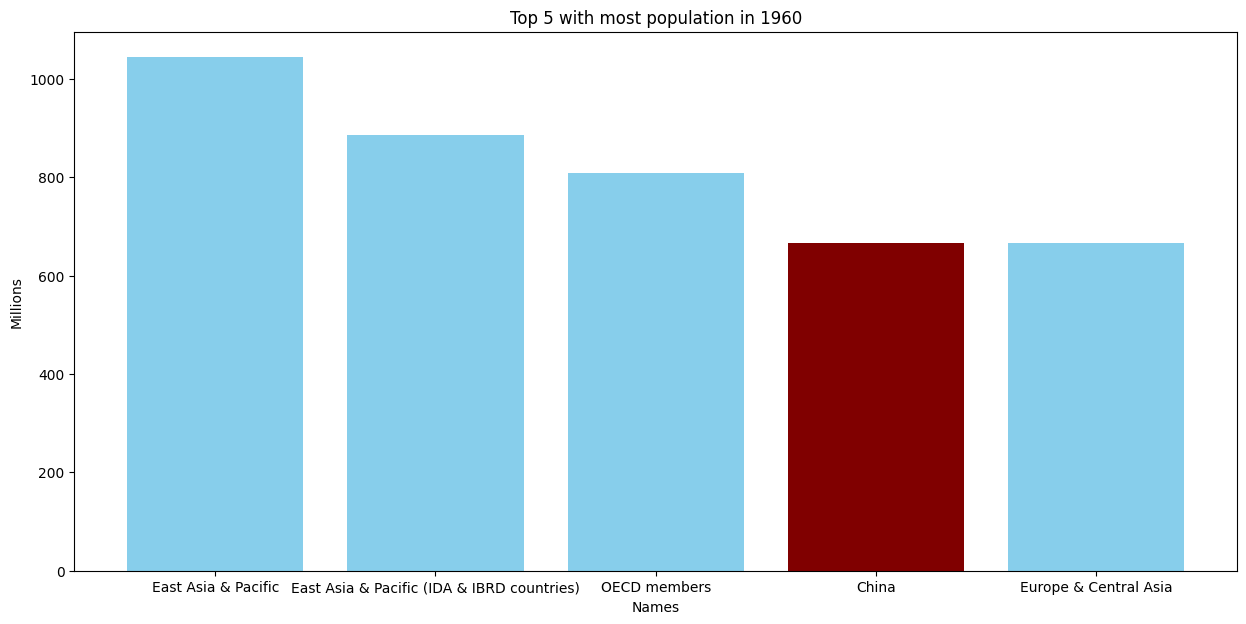

In [54]:
largest_population_1960_millions = largest_population['1960'] / 1e6
largest_countries = largest_population['Country Name']
colors = ['skyblue'] * len(largest_countries)
china_index = next((i for i, country in enumerate(largest_countries) if country == 'China'), None)
colors[china_index] = 'maroon'

plt.figure(figsize=(15,7))
plt.bar(largest_population['Country Name'],largest_population_1960_millions, color=colors)
plt.title('Top 5 with most population in 1960')
plt.xlabel('Names')
plt.ylabel('Millions')


To determine whether China's population has increased or decreased, we can examine the population data for the year 2022.

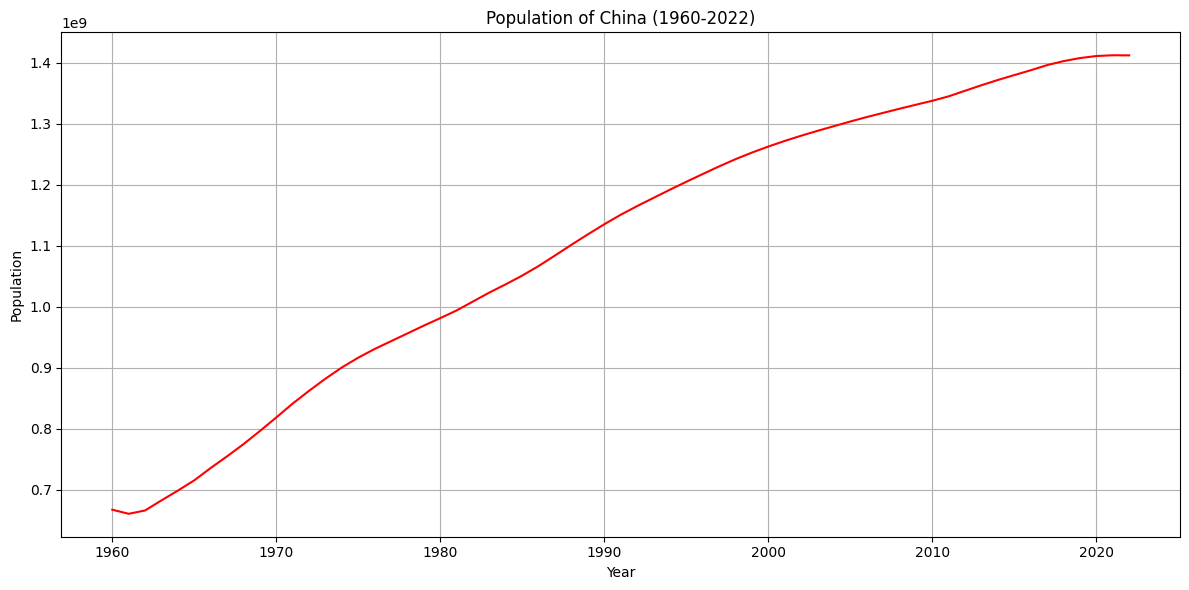

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,China,CHN,"Population, total",SP.POP.TOTL,667070000,660330000,665770000,682335000,698355000,715185000,...,1363240000,1371860000,1379860000,1387790000,1396215000,1402760000,1407745000,1411100000,1412360000,1412175000


In [55]:
china = filtered_df[filtered_df['Country Name']=='China'].reset_index(drop=True)
years = range(1960,2023)
china.head()
plt.figure(figsize=(12,6))
plt.plot(years, china.loc[:, '1960':'2022'].T, color='red')
plt.title('Population of China (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()
china.head()

In [56]:
intial_population_china = china.loc[0,'1960']
final_population_china = china.loc[0,'2022']
absolute_difference = final_population_china - intial_population_china
percentage_increase = (absolute_difference/intial_population_china)*100
percentage_increase

111.69817260557362


Over the span of 62 years, China's population has increased from 600 million to 1.4 billion by 111.6%.

Even after rapid growth of population in world, china still remains in top 5 list which even include south Asian countries combined.
<h5>but this time india takes the lead in 2022</h5>

In [57]:
filtered_df = filtered_df[~filtered_df['Country Name'].str.contains('income|only|dividend|total|situation|&' , case=False)]
largest_population = filtered_df.nlargest(5,'2022')[['Country Name','2022']]
largest_population.head()

,Country Name,2022
204,South Asia,1919348000
109,India,1417173173
40,China,1412175000
181,OECD members,1376606817
217,Sub-Saharan Africa,1211190002


In [102]:
india = filtered_df[filtered_df['Country Name']=='India']
india_population_1960 = india['1960']
india_population_2022 = india['2022']
absolute_difference = india_population_2022 - india_population_1960
percentage_increase = (absolute_difference/india_population_1960)*100
india


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
109,India,IND,"Population, total",SP.POP.TOTL,445954579,456351876,467024193,477933619,489059309,500114346,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173


<h2>India has surged into the top five countries, boasting a remarkable growth of 162% from year 1960 to 2022.</h2>

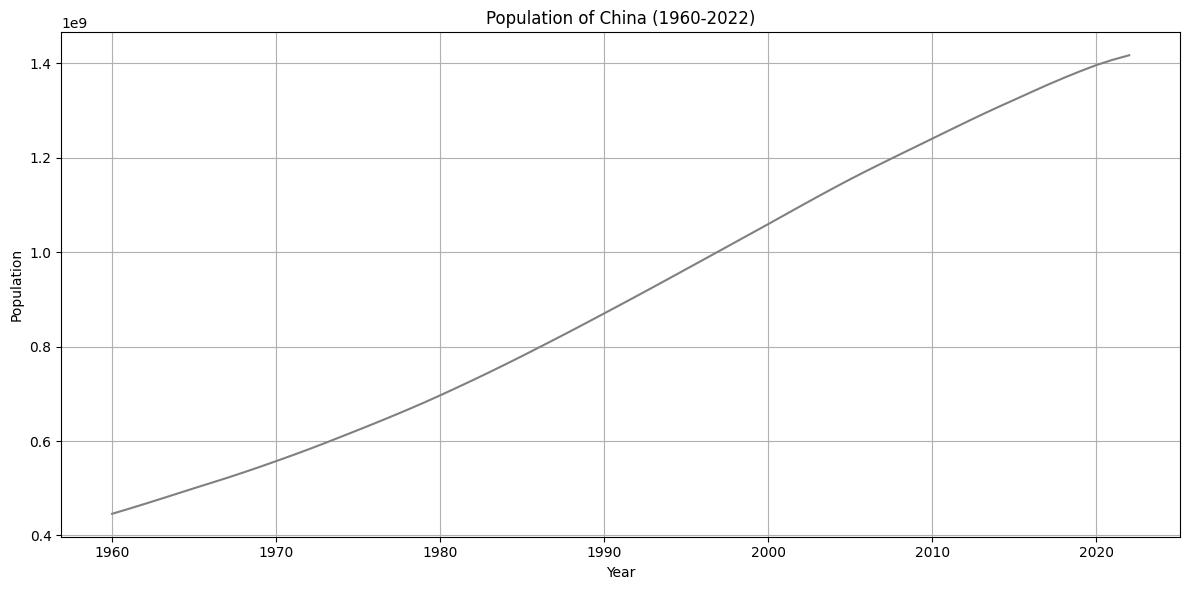

In [105]:
plt.figure(figsize=(12,6))
plt.plot(years,india.loc[:,'1960':'2022'].T,color='gray')
plt.title('Population of India (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>Lets find out how much countries have grown in their populations</h1>

In [67]:

world_population_all_years.dropna(axis=1, how='all')
world_population_1960 = world_population_all_years.loc[259,'1960']
world_population_2022 = world_population_all_years.loc[259,'2022']
world_population_all_years_difference = world_population_2022 - world_population_1960
world_population_all_years_difference_percentage = world_population_all_years_difference/world_population_1960*100
world_population_all_years_difference_percentage




162.27987399084057

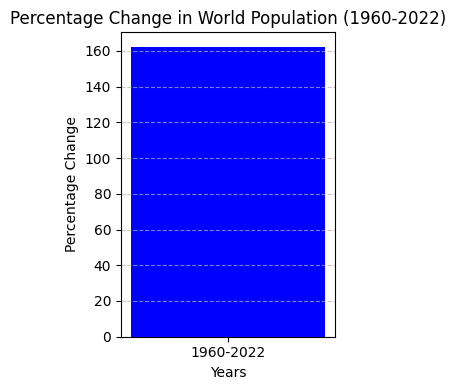

In [73]:
plt.figure(figsize=(3,4))
plt.bar(['1960-2022'], world_population_all_years_difference_percentage, color='blue')
plt.title('Percentage Change in World Population (1960-2022)')
plt.xlabel('Years')
plt.ylabel('Percentage Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>It turns out that the world drastically doubled its population in just 62 years.(162%)</h3>


<h1>Prediction for upcoming 2 years</h1>
<p>lets predict the current year's (2024) population which is '8.1B'</p>

In [83]:
year=2022-1960 + 1
population_change_rate = (world_population_2022-world_population_1960)/year
predicted_population = world_population_2022+population_change_rate*2
predicted_population

8107120533.285714

now as we know, the prediction is very close to be 100% accurate. So, lets predict next 10 years (2024-2034) population.

In [92]:
year=2022-1960 + 10
population_change_rate = (world_population_2022-world_population_1960)/year
predicted_10_years_population = world_population_2022+population_change_rate*10
# percentage_change = (predicted_10_years_population / world_population_2022) * 100
# percentage_change

predicted_percentage_difference = ((predicted_10_years_population-world_population_2022)/world_population_2022)*100
predicted_percentage_difference

8.593442967874788

<h4>according to the dataset provided by world bank, the world population will grow 8.5% in next 10 years.</h4>